# Infer new Model

To infer a new model with IGoR will need non productive sequences as input and a new model with a uniform probability distribution.

In [1]:
import pandas as pd
df_input = pd.read_csv('HIP00110.tsv.gz', sep='\t')
df_input

,nucleotide,aminoAcid,count (templates/reads),frequencyCount (%),cdr3Length,vMaxResolved,vFamilyName,vGeneName,vGeneAllele,vFamilyTies,...,jOrphon,vFunction,dFunction,jFunction,fractionNucleated,vAlignLength,vAlignSubstitutionCount,vAlignSubstitutionIndexes,vAlignSubstitutionGeneThreePrimeIndexes,vSeqWithMutations
0,GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...,NaN,3088,0.019194,38,TCRBV05-01*01,TCRBV05,TCRBV05-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,1772,0.010946,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,CASSLRVGGYGYTF,1763,0.010841,42,TCRBV07-09,TCRBV07,TCRBV07-09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...,NaN,1241,0.007660,52,TCRBV01-01*01,TCRBV01,TCRBV01-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCA...,CASRRLGGLNTEAFF,985,0.006130,45,TCRBV25-01*01,TCRBV25,TCRBV25-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130935,AAAAGAACCCGACAGCTTTCTATCTCTGTGCCAGTAACGCGGGTCT...,NaN,1,0.000001,55,TCRBV19-01,TCRBV19,TCRBV19-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130936,AAAAGAACCCGACAGCTTTCTATCTCTGTGCCAGCAGTAACCCCCC...,NaN,1,0.000001,55,TCRBV19-01,TCRBV19,TCRBV19-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130937,AAAACTCATCCTGTACCTTGGAGATCCAGTCCACGGAGTCAGGGGA...,NaN,1,0.000010,19,TCRBV21-01*01,TCRBV21,TCRBV21-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130938,AAAAAAACAGAATTTCCTGCTGGGGTTGGAGTCGGCTGCTCCCTCC...,NaN,1,0.000002,17,TCRBV06,TCRBV06,unresolved,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pygor3 as p3

## Get Genomic Germline templates

In [3]:
imgt_species_list = p3.imgt.get_species_list()
print( imgt_species_list )

['', 'Heterocephalus+glaber', 'Cercocebus+atys', 'Mus+minutoides', 'Macaca+mulatta', 'Papio+anubis+anubis', 'Oncorhynchus+mykiss', 'Canis+lupus+familiaris', 'Mustela+putorius+furo', 'Vicugna+pacos', 'Salmo+salar', 'Tursiops+truncatus', 'Mus+musculus', 'Mus+spretus', 'Oryctolagus+cuniculus', 'Felis+catus', 'Bos+taurus', 'Macaca+nemestrina', 'Macaca+fascicularis', 'Gallus+gallus', 'Equus+caballus', 'Camelus+dromedarius', 'Gorilla+gorilla+gorilla', 'Homo+sapiens', 'Rattus+norvegicus', 'Mus+cookii', 'Capra+hircus', 'Ornithorhynchus+anatinus', 'Sus+scrofa', 'Rattus+rattus', 'Mus+pahari', 'Ovis+aries', 'Danio+rerio', 'Mus+saxicola']


In [4]:
help(p3.imgt.download_ref_genome_VDJ)

Help on function download_ref_genome_VDJ in module pygor3.imgt:

download_ref_genome_VDJ(species: str, chain: str, dropna=False, **kwargs)
    Return a dictionary with genomics dataframes and also save files in a IGoR directory structure.
    :param species: IMGT species name
    :param chain: IMGT chain receptor name
    :param dropna: Remove rows with no defined values in any column
    :return : dictionary of pandas DataFrame with



In [5]:
imgt_species = 'Homo+sapiens'
imgt_chain = 'TRB'
hb_genomic_dict = p3.imgt.download_ref_genome(imgt_species, imgt_chain, dropna=True)

Homo+sapiens TRBV http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
Homo+sapiens TRBD http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
Homo+sapiens TRBJ http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-TRP
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&s

## Create a new model

In [6]:
hb_mdl_0 = p3.IgorModel.make_default_from_Dataframe_dict(hb_genomic_dict)

In [7]:
df_input_test = df_input['nucleotide'].loc[:500]
df_input_test

0      GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...
1      GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...
2      ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
3      TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...
4      GAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCA...
                             ...                        
496    CTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGCGTAA...
497    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
498    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
499    CTGAAGATCCGGTCCACAAAGCTGGAGGACTCAGCCATGTACTTCT...
500    CTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTGGGACTA...
Name: nucleotide, Length: 501, dtype: object

In [8]:
help(p3.naive_align)

Help on function naive_align in module pygor3.IgorIO:

naive_align(input_sequences: Union[NoneType, str, pathlib.Path, pandas.core.frame.DataFrame, <built-in function array>, list] = None, mdl: Union[NoneType, str, pathlib.Path, pygor3.IgorIO.IgorModel, pygor3.IgorIO.IgorModel_Parms] = None, igor_wd=None, igor_threads=None, igor_batchname=None, batch_clean=True, igor_align_dict_opts: Union[NoneType, dict] = None)
    Return preprocessing with IGoR
    :param input_sequences: Sequences to align as dataframe, numpy array, list or string.
    :param mdl: IgorModel
    :param igor_wd: IGoR working directory
    :param igor_threads: IGoR number of threads option
    :param igor_align_dict_opts: Additional options for naive alignment.



In [9]:
df_functionality, df_CDR3 = p3.naive_align(df_input_test, hb_mdl_0)

Writing model parms in file  ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/models/model_marginals.txt
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_aligning_lr1bnn43 -batch dataIGoRxTPsmaVOMq -read_seqs ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMqinput_sequences.csv
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_aligning_lr1bnn43 -batch dataIGoRxTPsmaVOMq -set_genomic  --V ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/ref_genome/genomicVs.fasta --D ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/ref_genome/genomicDs.fasta --J ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_aligning_lr1bnn43/dataIGoRxTPsmaVOMq_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all   ---bes

In [10]:
df_functionality

,functionality,in_frame,stop_codon
seq_index,,,
0,False,False,True
1,True,True,False
2,True,True,False
3,False,False,True
4,True,True,False
...,...,...,...
496,True,True,False
497,True,True,False
498,True,True,False


In [11]:
df_CDR3

,v_anchor,j_anchor,CDR3nt,CDR3aa,v_call,j_call
seq_index,,,,,,
0,43.0,81.0,TGCGCCAGCAGCATCAAAGGGGCTCACCCCTCCACTTT,NaN,TRBV5-1*01,TRBJ1-6*02
1,30.0,81.0,TGTGCCACCACGGGTACTAGCGGGGGCCCAAGCCAGAGTACGCAGT...,CATTGTSGGPSQSTQYF,TRBV10-3*01,TRBJ2-3*01
2,39.0,81.0,TGTGCCAGCAGCTTACGAGTCGGGGGCTATGGCTACACCTTC,CASSLRVGGYGYTF,TRBV7-9*01,TRBJ1-2*01
3,29.0,81.0,TGCACCAGCAGCCAAGGGGATCGCGGGGGGCCACTACAATGAGCAG...,NaN,TRBV1*01,TRBJ2-1*01
4,36.0,81.0,TGTGCCAGCAGACGCCTCGGAGGGTTGAACACTGAAGCTTTCTTT,CASRRLGGLNTEAFF,TRBV25-1*01,TRBJ1-1*01
...,...,...,...,...,...,...
496,30.0,81.0,TGTGCCAGCAGCGTAAGGGGGACTAGCGGGGGGTCCGCTACGCAGT...,CASSVRGTSGGSATQYF,TRBV9*01,TRBJ2-3*01
497,39.0,81.0,TGTGCCAGCAGTTATATCCCTGTCAGGGAAGAGCAGTACTTC,CASSYIPVREEQYF,TRBV6-5*01,TRBJ2-7*01
498,39.0,81.0,TGTGCCAGCAGGCAGGGGGCGCGAGGAAACACCATATATTTT,CASRQGARGNTIYF,TRBV6-5*01,TRBJ1-3*01


In [12]:
df_input_test_no_productive = df_input_test.loc[~df_functionality['functionality'] ]
df_input_test_no_productive

0      GAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGC...
3      TGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGG...
8      ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
9      GGCTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGC...
12     ACCTACACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGC...
                             ...                        
487    GAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGA...
488    GAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGC...
489    GAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCTGCAGCGTC...
490    CTTGGAGCTGGAGGACTCGGCCCTGTATCTCTGTGCCAGCATCCTG...
500    CTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTGGGACTA...
Name: nucleotide, Length: 105, dtype: object

# Infer model

In [13]:
help(p3.infer)

Help on function infer in module pygor3.IgorIO:

infer(input_sequences: Union[str, list, pandas.core.frame.DataFrame, numpy.ndarray, pathlib.Path], mdl: pygor3.IgorIO.IgorModel, igor_wd=None, batch_clean=True, return_likelihoods=True, N_iter=None, igor_infer_dict_opts: Union[NoneType, dict] = None, igor_align_dict_opts: Union[NoneType, dict] = None) -> pygor3.IgorIO.IgorModel
    Returns inferred IgorModel from input_sequences with initial model mdl.
    :param input_sequences: String sequences in list, numpy array, pandas dataframe or file.
    :param mdl: IgorModel object.
    :param igor_wd: Working directory use to run IGoR to infer.
    :param batch_clean: If True clean all files used with IGoR, if false keep all files, default True.
    :param return_likelihoods: If True return likelihoods pandas dataframe with likelihoods
    :param N_iter: Number of iterations to infer model.
    :param igor_infer_dict_opts: Additional IGoR options to pass for inference.
    :param igor_align_d

In [14]:
hb_mdl_new, df_likelihoods = p3.infer(df_input_test_no_productive, hb_mdl_0, N_iter=10, return_likelihoods=True)

Writing model parms in file  ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/models/model_marginals.txt
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_inferring_do_a3jn0 -batch dataIGoRmvUJ9YkPri -read_seqs ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPriinput_sequences.csv
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_inferring_do_a3jn0 -batch dataIGoRmvUJ9YkPri -set_genomic  --V ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/ref_genome/genomicVs.fasta --D ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/ref_genome/genomicDs.fasta --J ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_inferring_do_a3jn0/dataIGoRmvUJ9YkPri_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --al

In [15]:
df_likelihoods

,iteration,mean_log_Likelihood,n_seq
0,1,-16.0033,104
1,2,-11.6762,104
2,3,-11.3408,104
3,4,-11.1774,104
4,5,-11.0885,104
5,6,-11.0380,104
6,7,-11.0009,104
7,8,-10.9747,104
8,9,-10.9552,104
9,10,-10.9353,104


<AxesSubplot:>

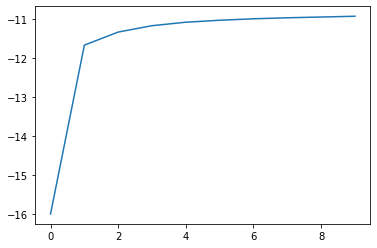

In [16]:
df_likelihoods['mean_log_Likelihood'].plot()

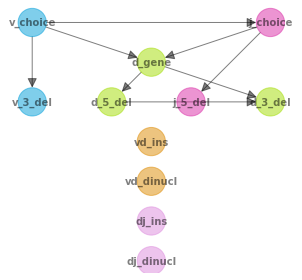

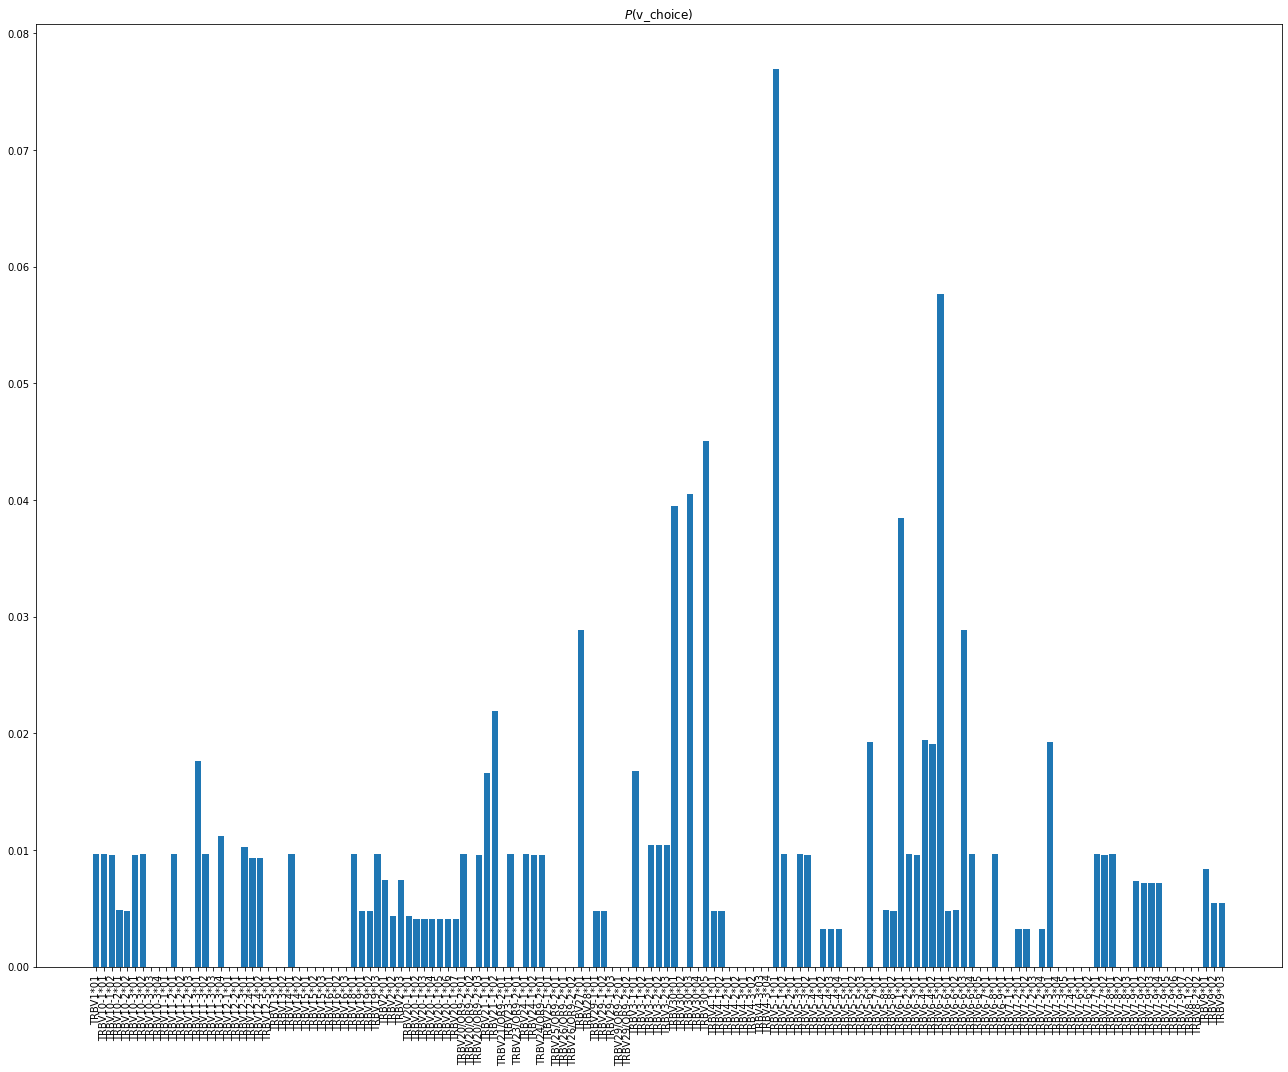

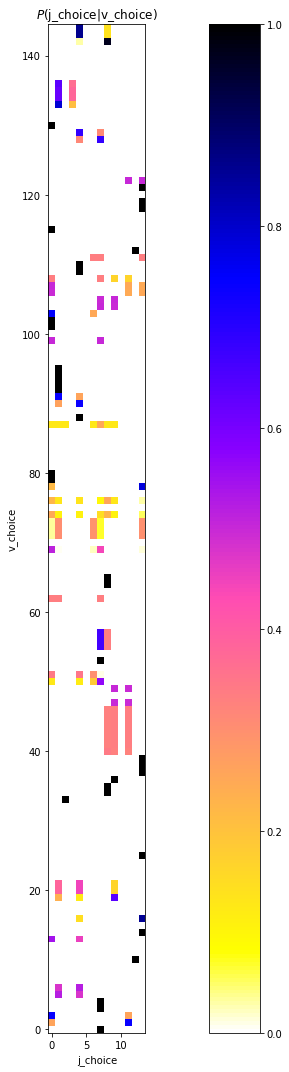

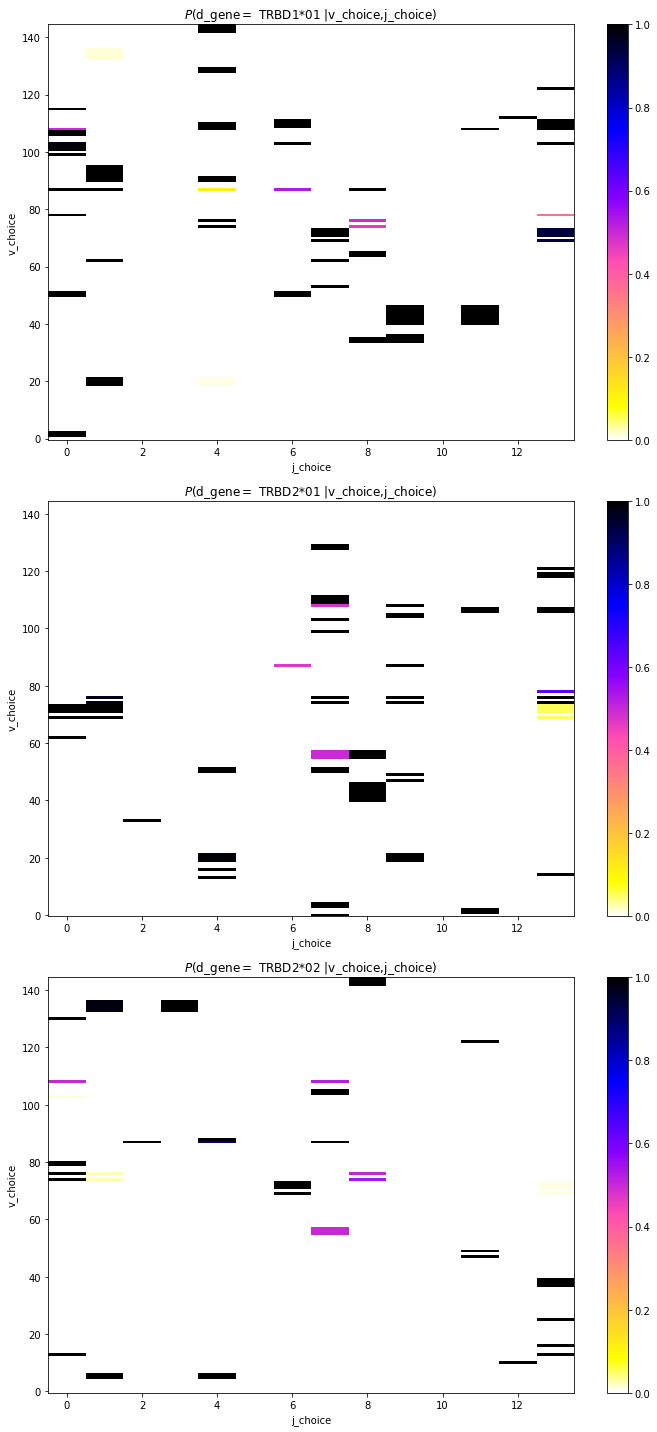

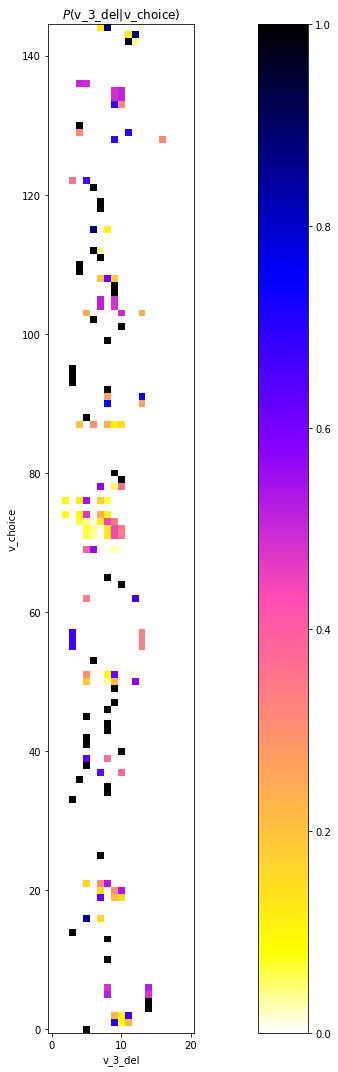

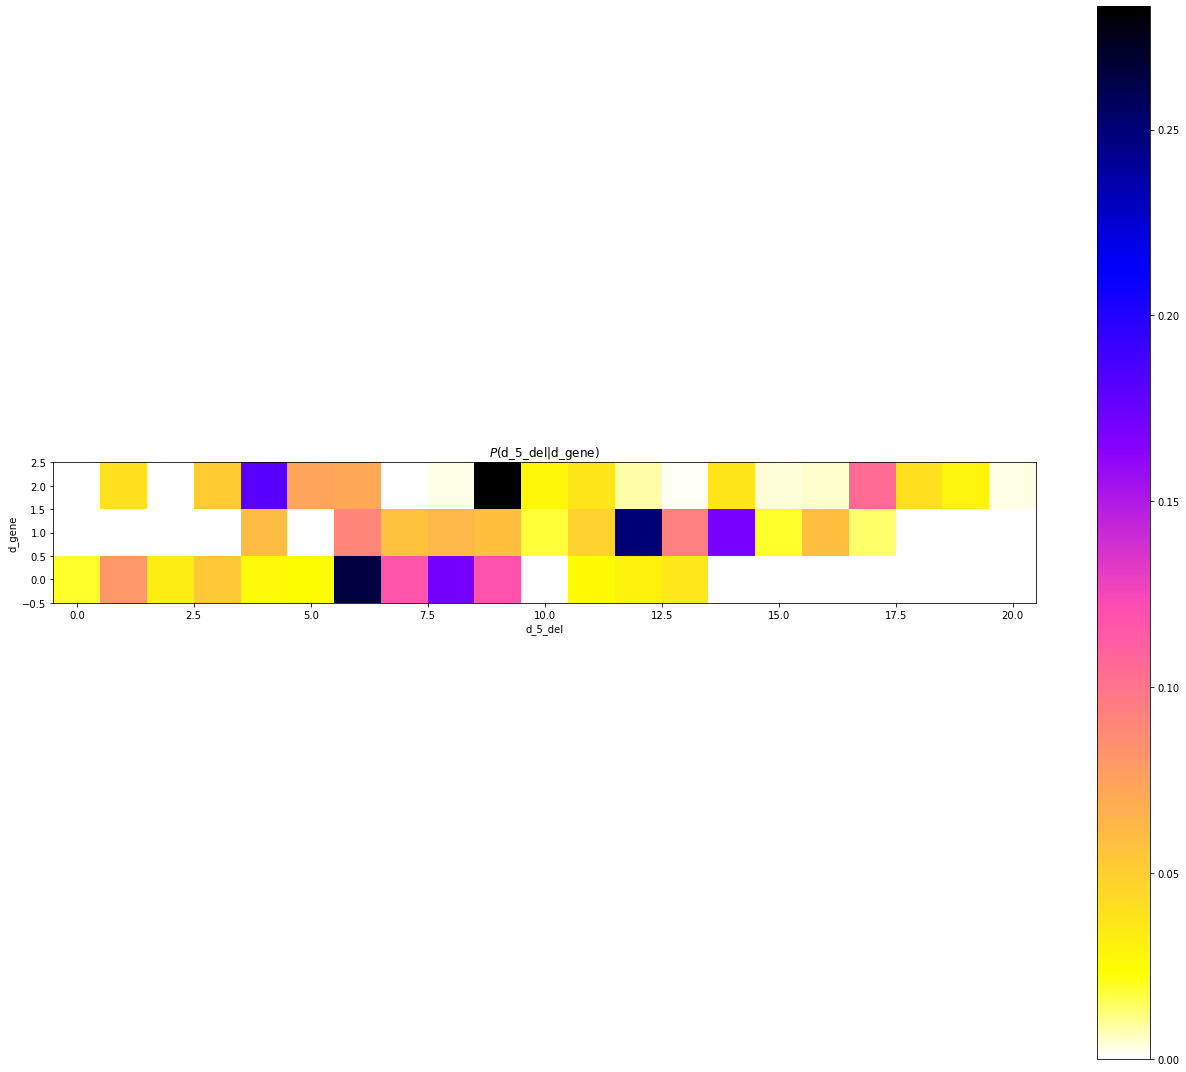

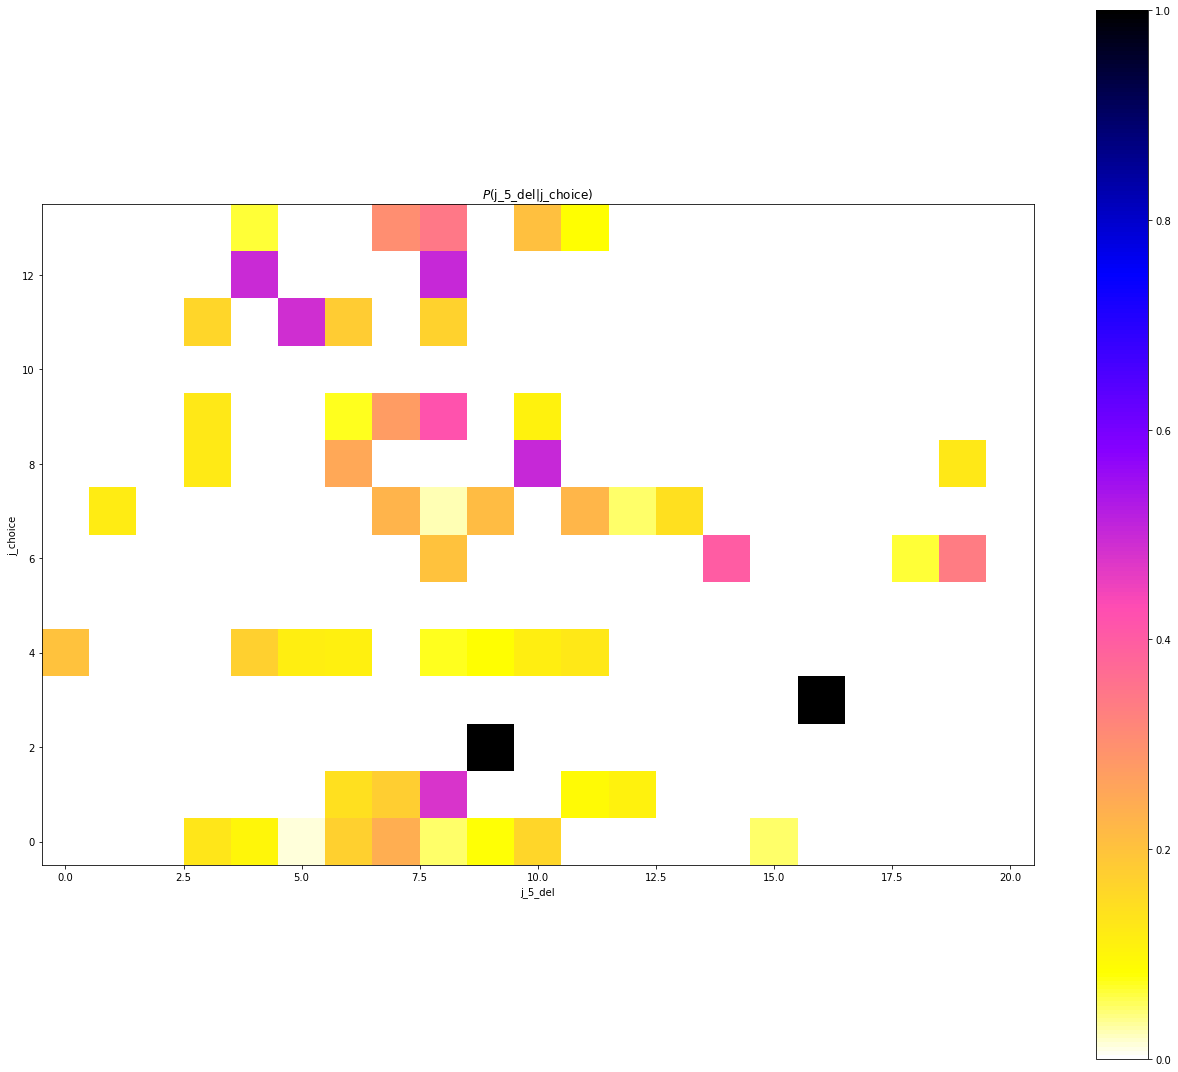

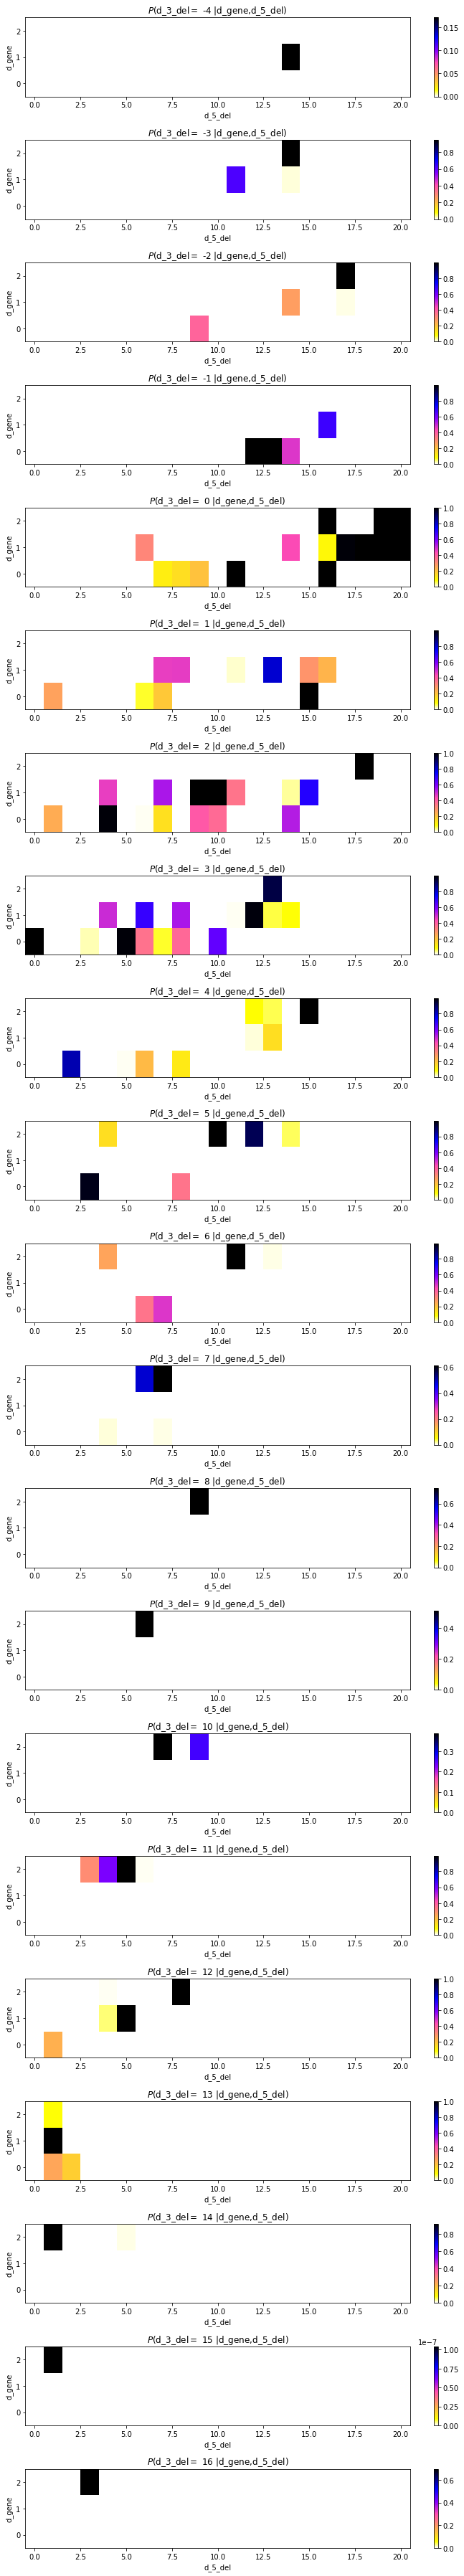

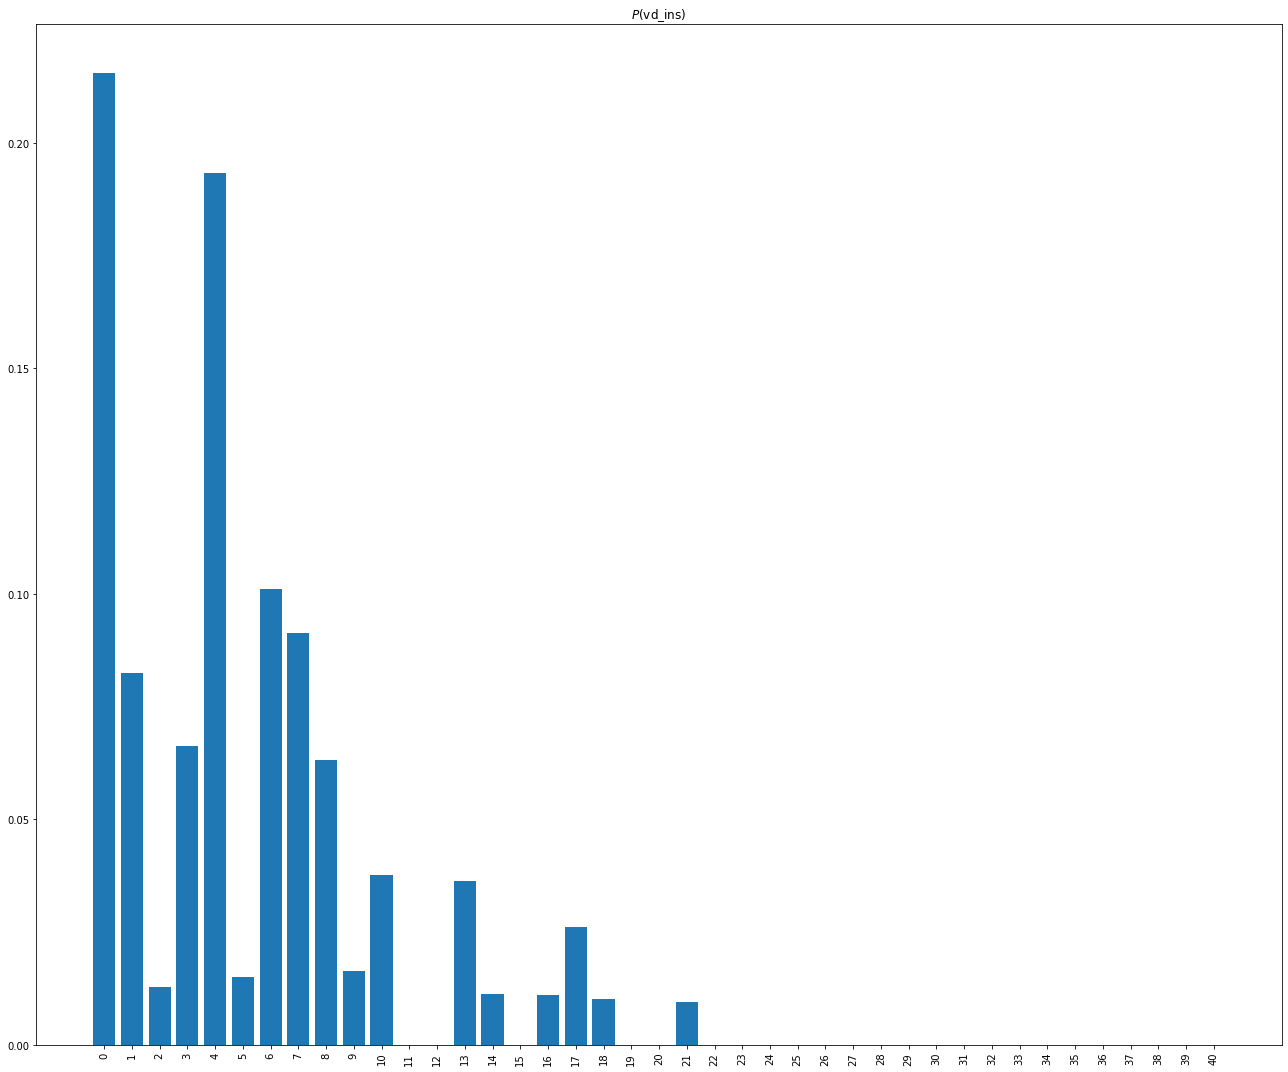

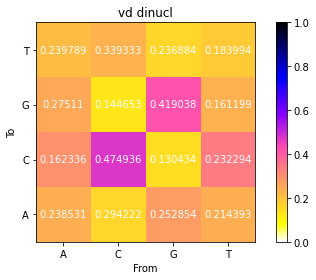

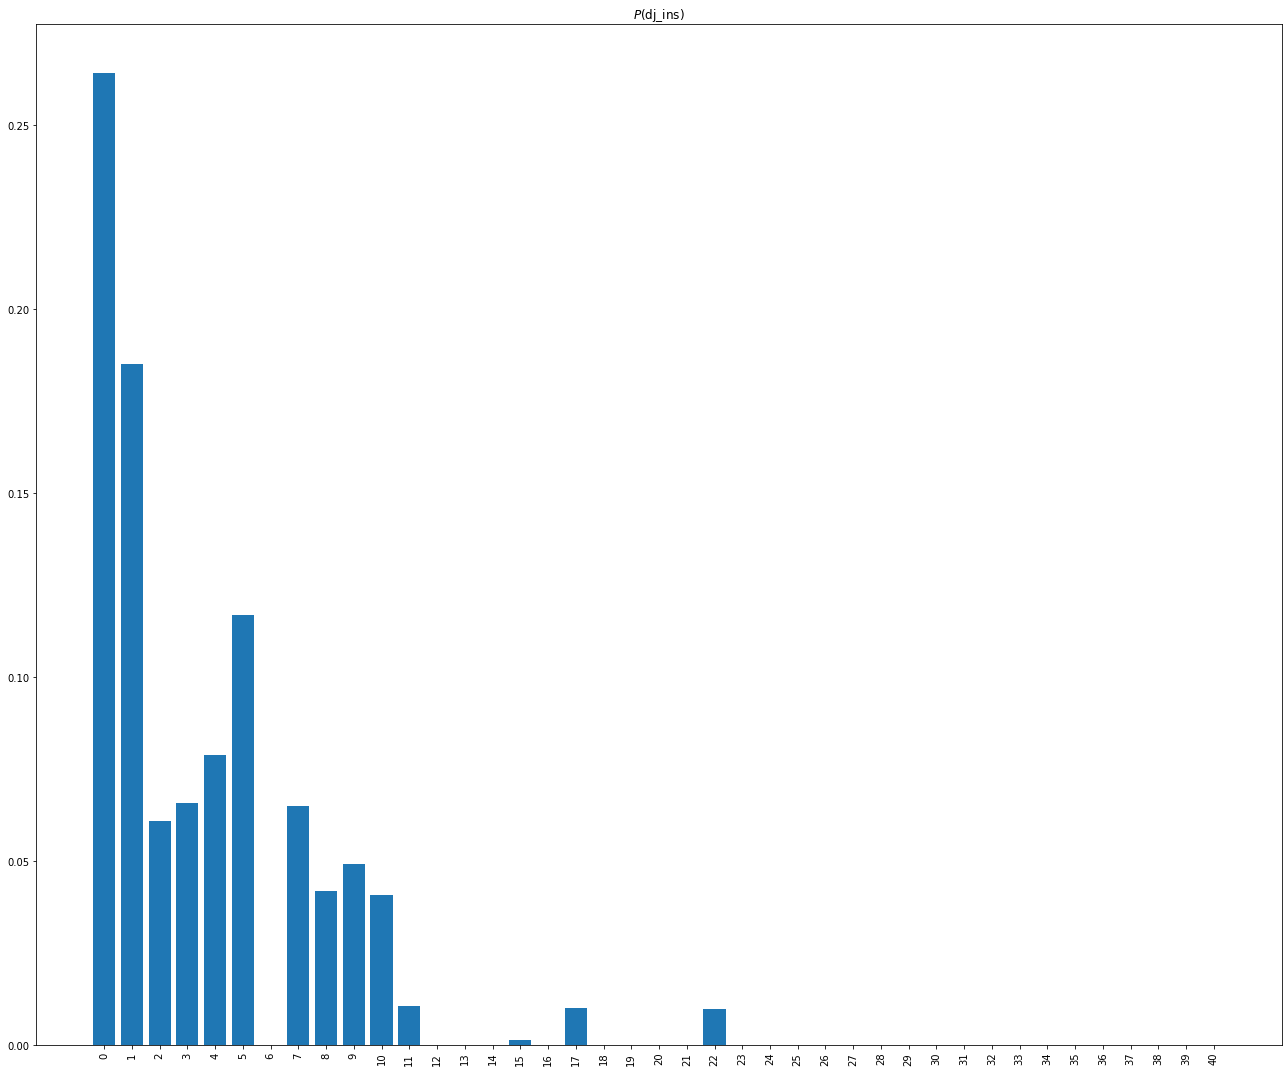

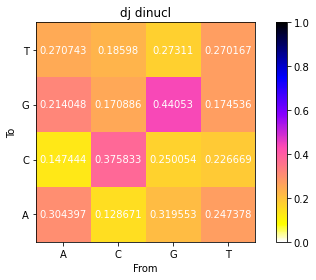

In [17]:
hb_mdl_new.export_plot_Pconditionals('CP_hb_new')

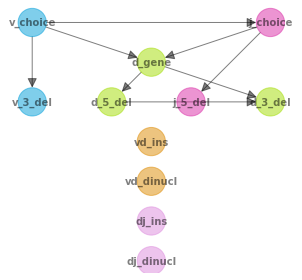

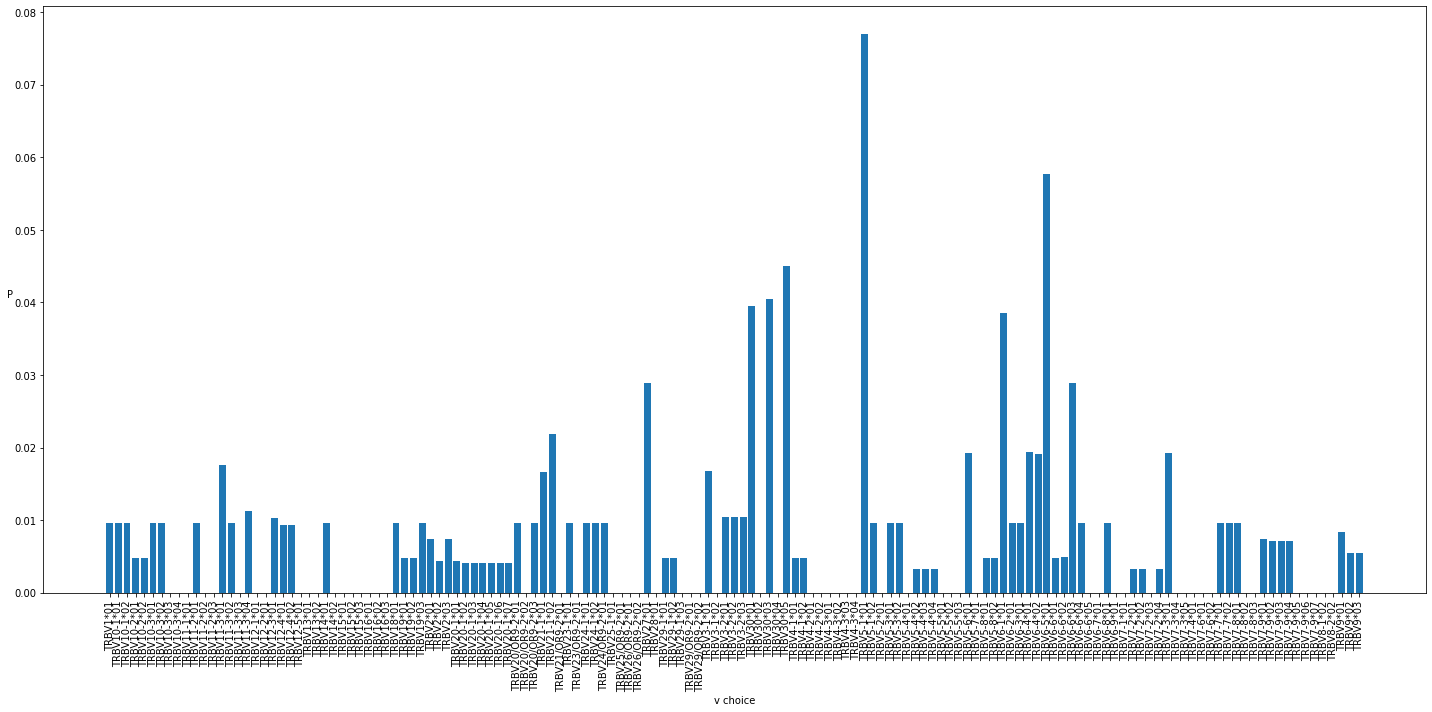

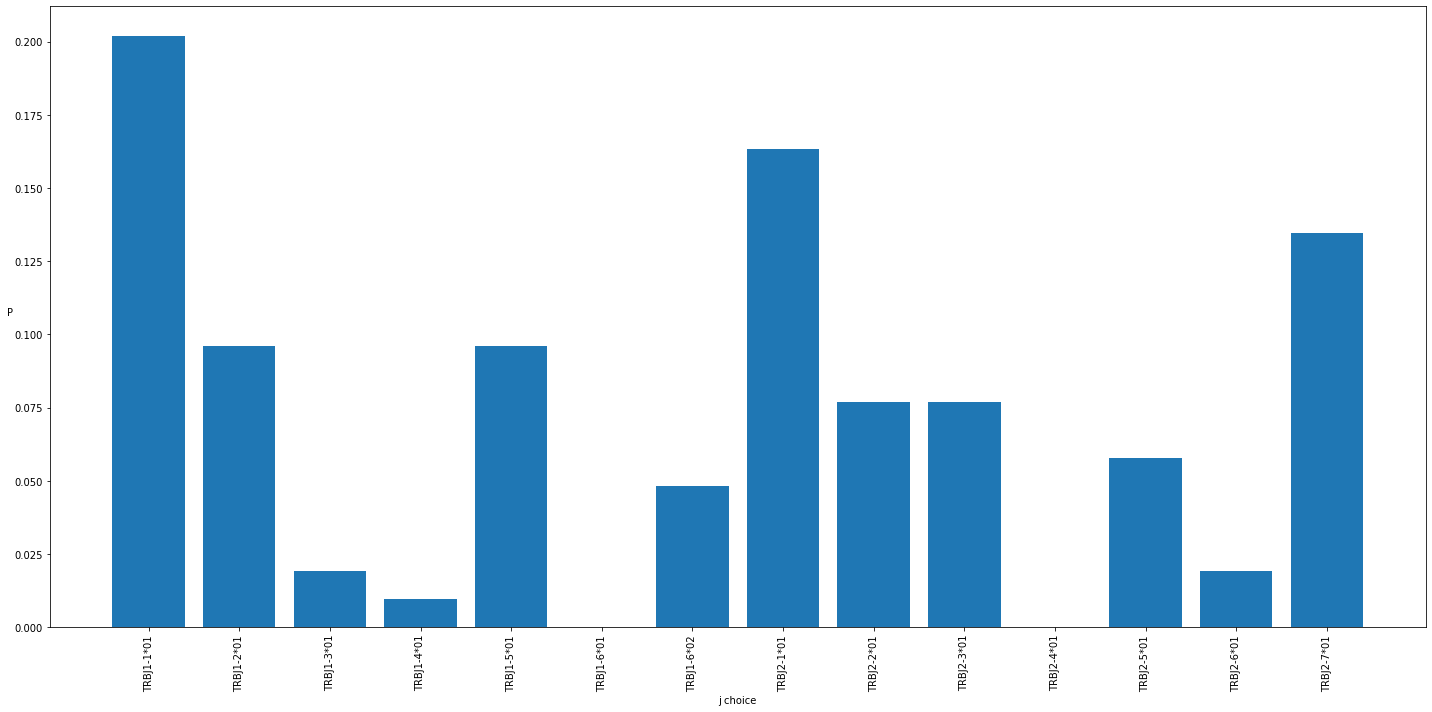

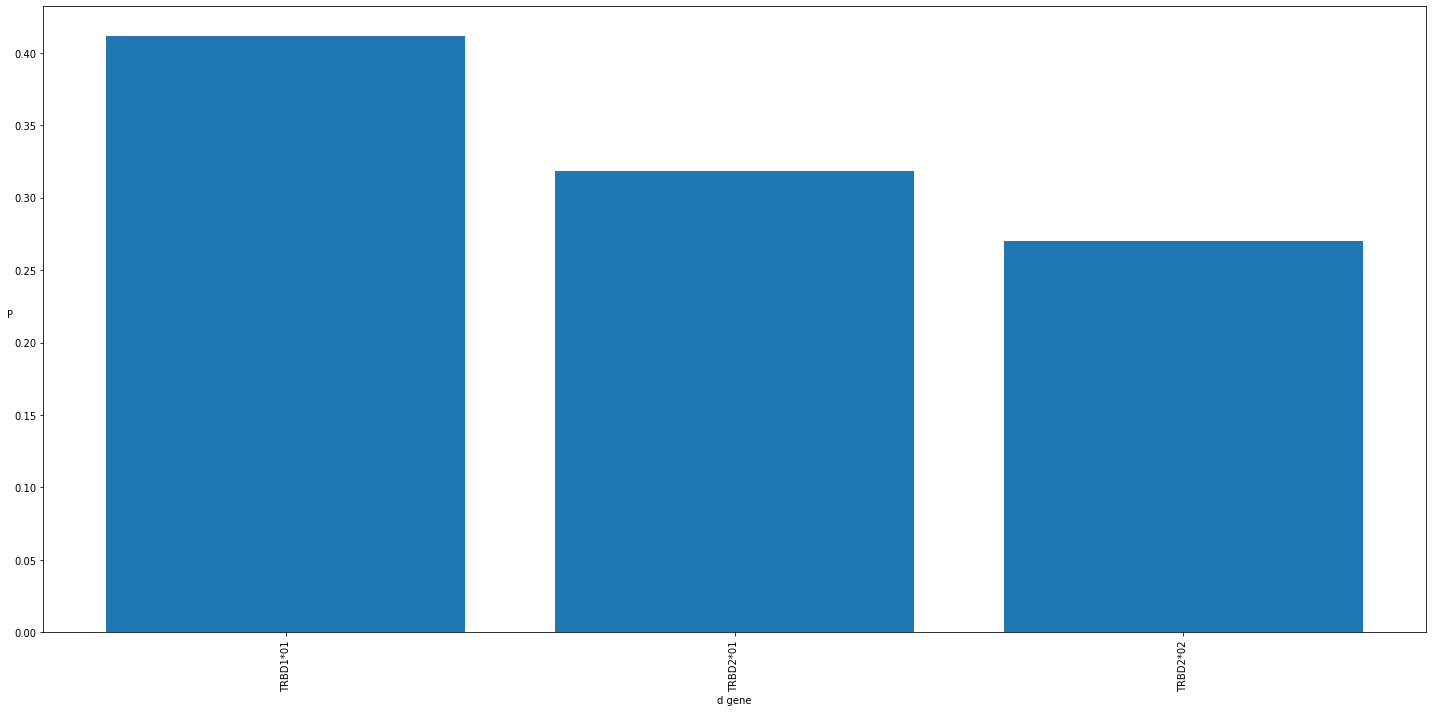

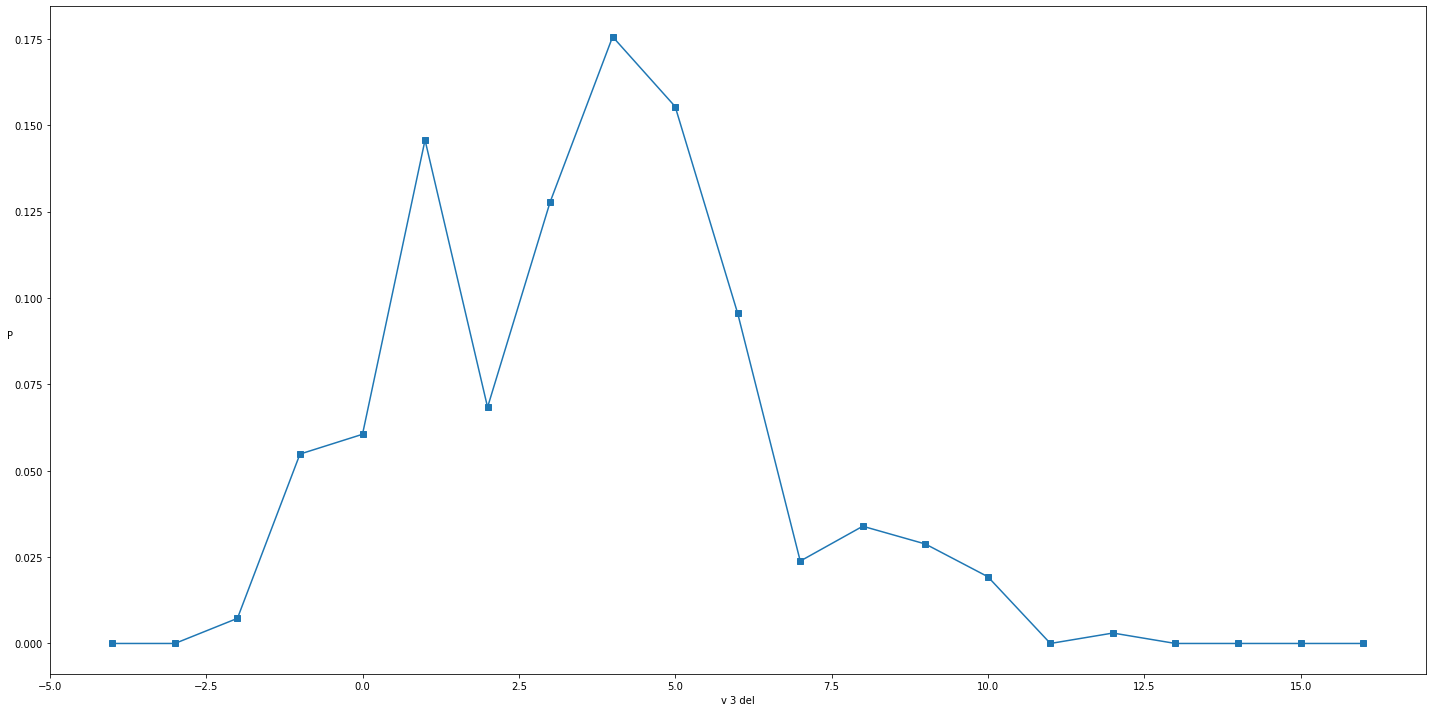

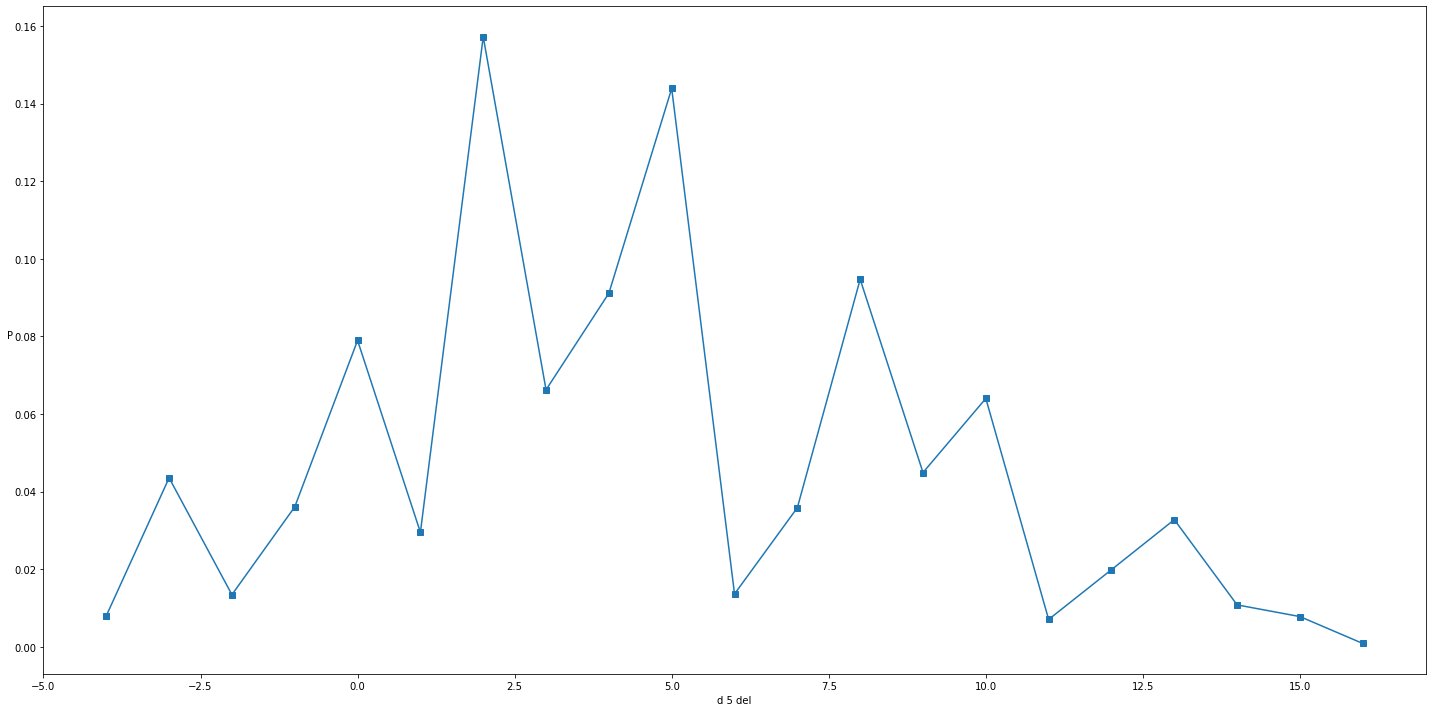

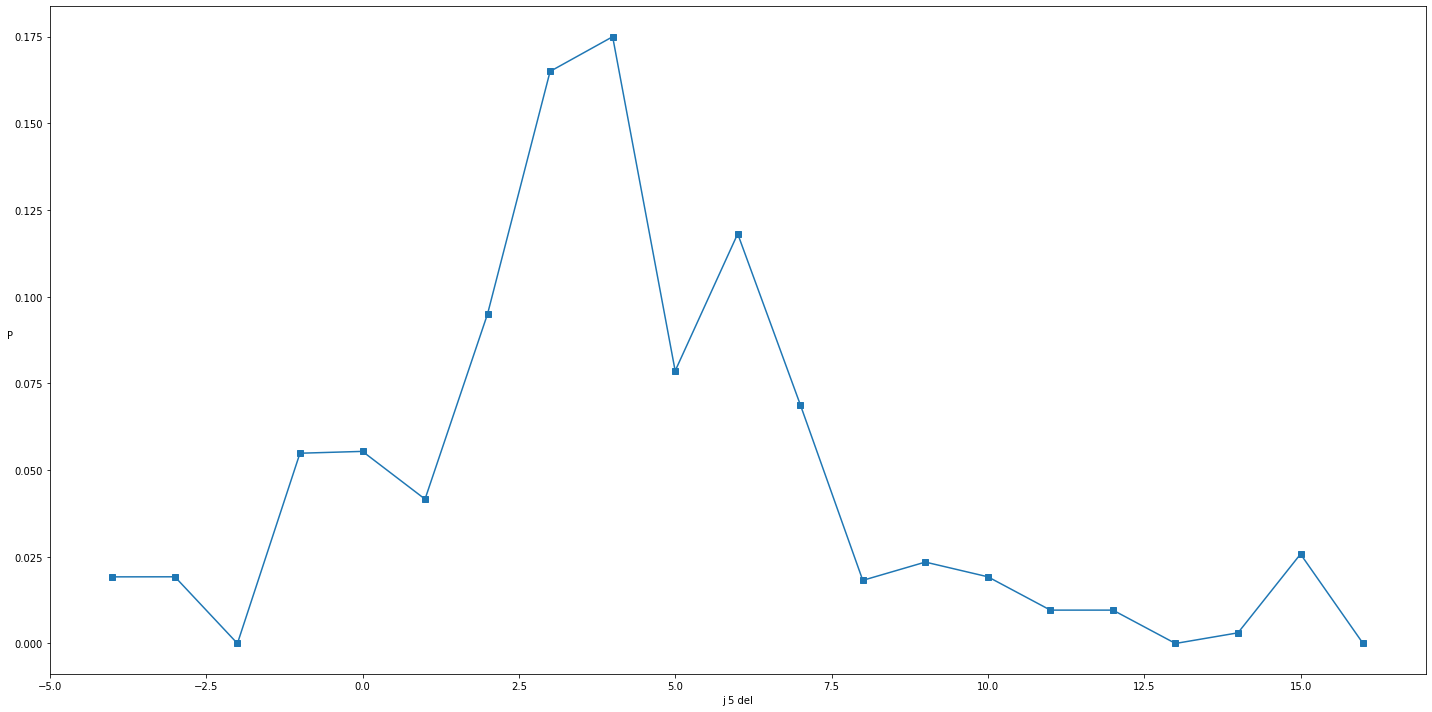

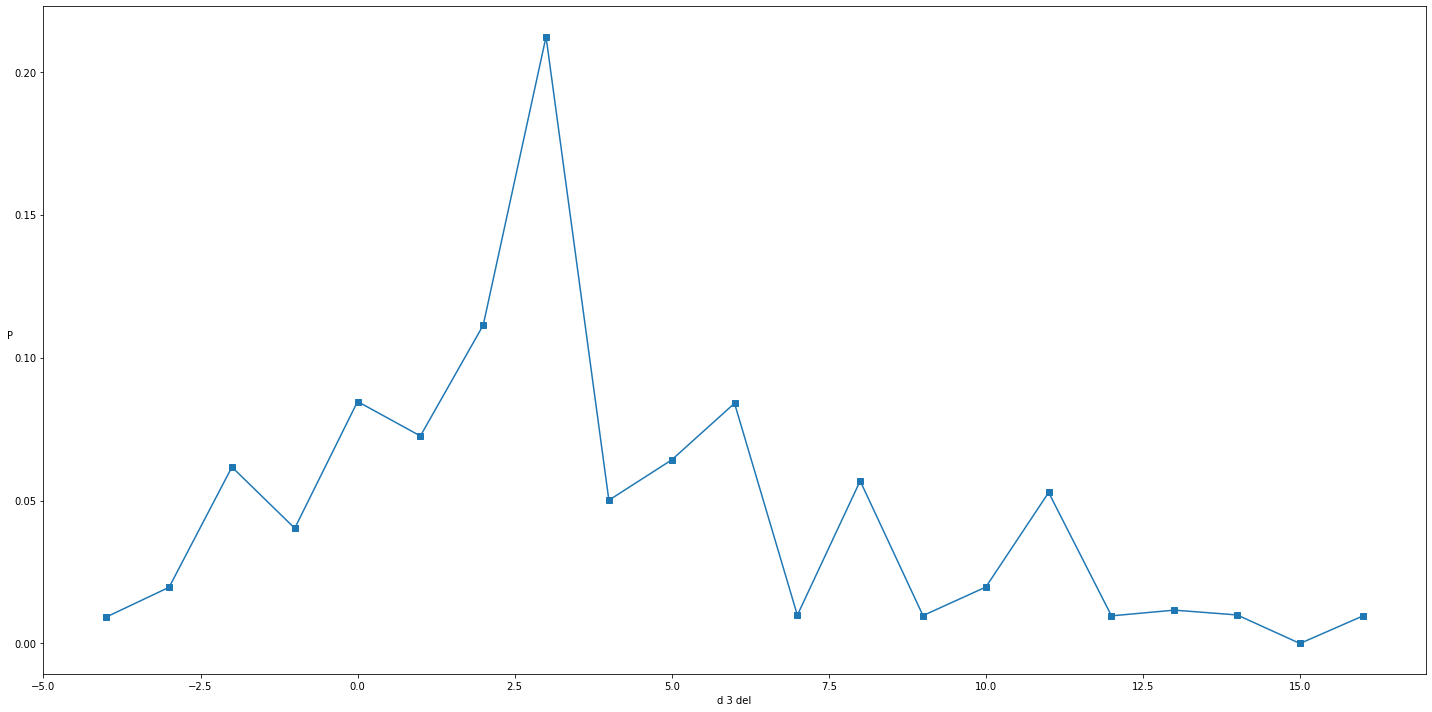

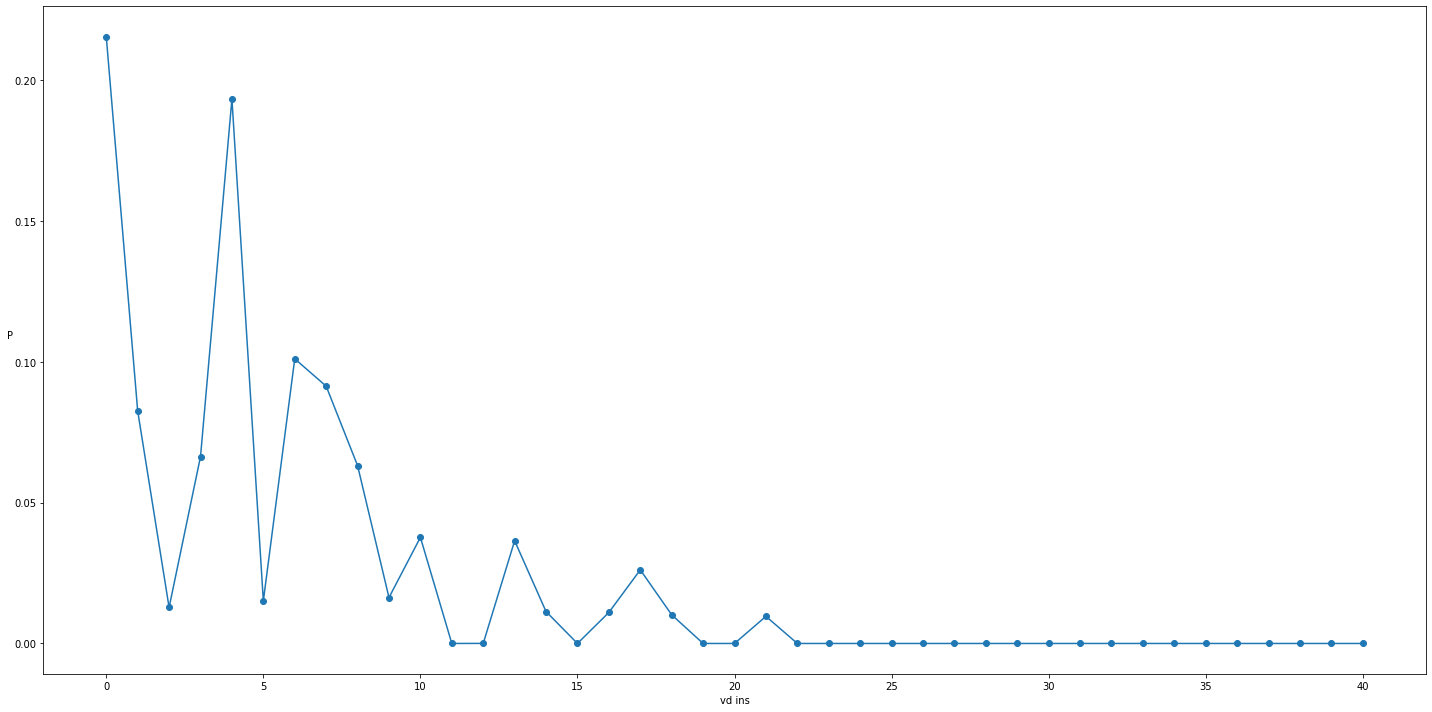

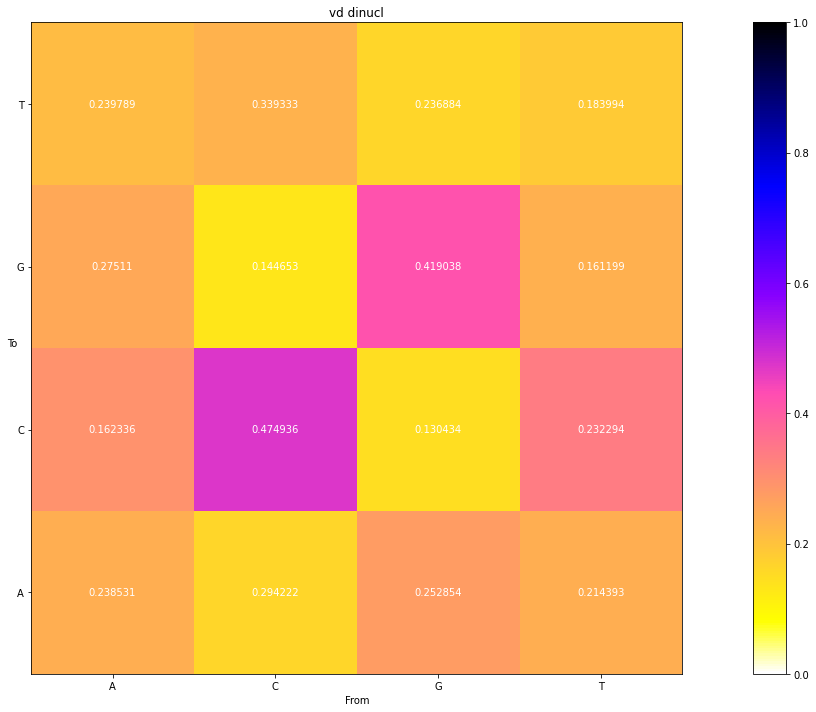

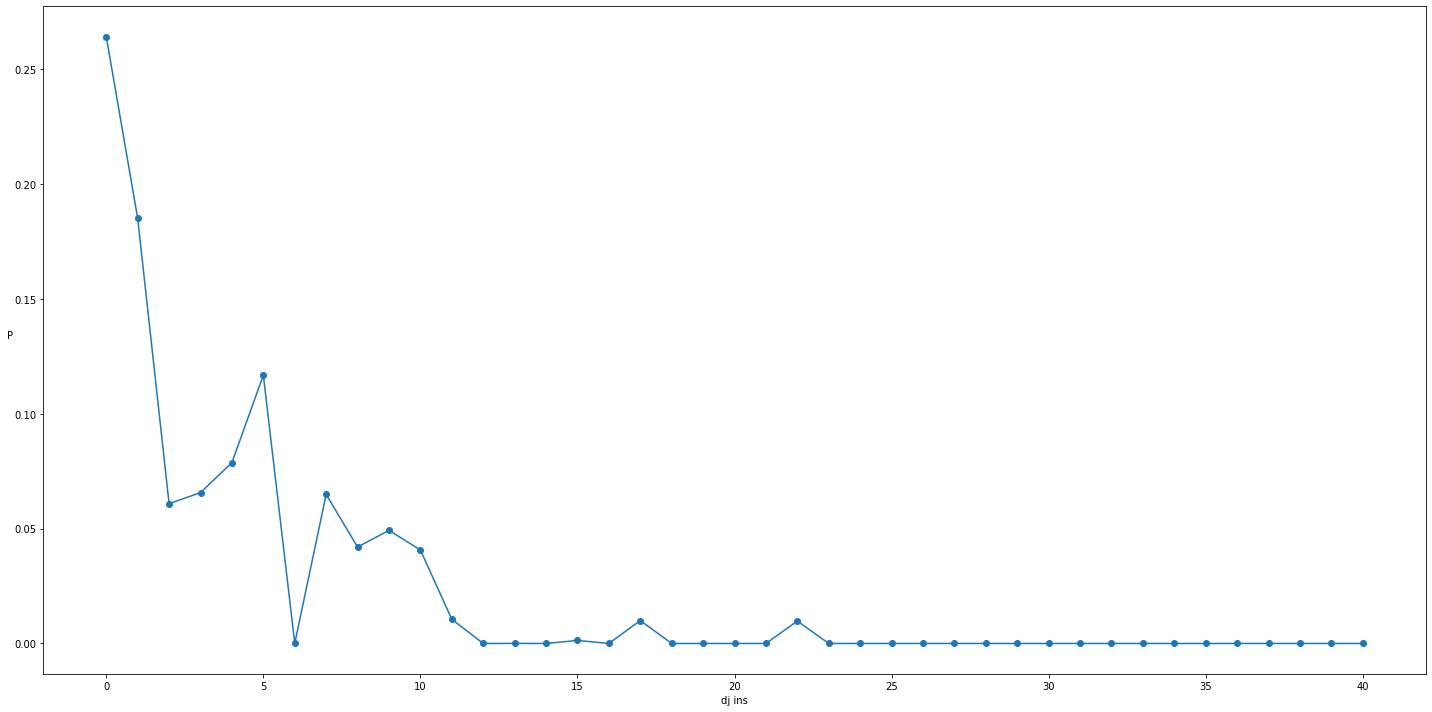

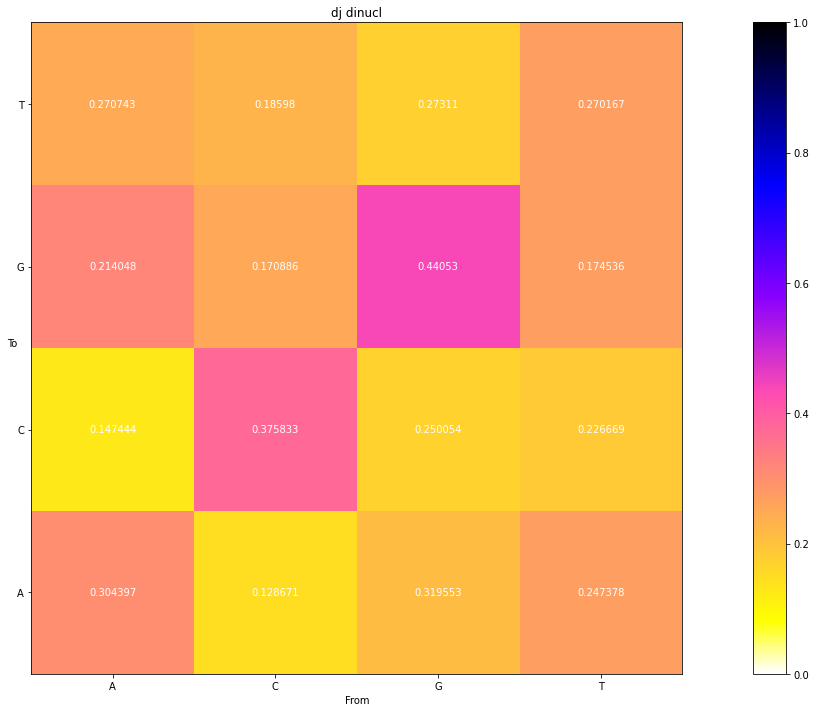

In [18]:
hb_mdl_new.export_plot_Pmarginals('MP_hb_new')

# SONIA integration (EXPERIMENTAL)

In [19]:
help(hb_mdl_new.write_mdldata_dir)

Help on method write_mdldata_dir in module pygor3.IgorIO:

write_mdldata_dir(model_dir_path, sep=';', b_igor_directory=True) method of pygor3.IgorIO.IgorModel instance
    Export IgorModel and IgorRefGenome
    :param model_dir_path: Directory to save model in IGoR directory structure
    :param sep: Field separator, default ';'
    :param b_igor_directory: If True default IGoR directory structure, default False.



In [20]:
hb_mdl_new.write_mdldata_dir('hb_new_model', sep=',', b_igor_directory=False)

Writing model parms in file  hb_new_model/model_params.txt
Writing model marginals in file  hb_new_model/model_marginals.txt


In [21]:
help(p3.infer_SONIA_from_directory)

Help on function infer_SONIA_from_directory in module pygor3.IgorIO:

infer_SONIA_from_directory(mdl_dirname: Union[str, pathlib.Path], data_seqs, num_gen_seqs=200000, reset_gen_seqs=True, custom_model_folder=None, add_error=False, custom_error=None, epochs=10, batch_size=5000, initialize=True, seed=None, validation_split=0.2, monitor=False, verbose=0)
    Return SONIA model
    :param mdl_dirname: Path, str or IgorModel object use to infer the selection model with SONIA
    :param data_seqs: List of arrays with format [ 'CDR3_aa', 'v_call', 'j_call' ]



In [22]:
df_input_test_productive = df_input_test.loc[df_functionality['functionality'] ]
df_input_test_productive

1      GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...
2      ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
4      GAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCA...
5      GTGAGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCA...
6      AGGCTGGAGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTG...
                             ...                        
495    CTGGAGTCCGCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCA...
496    CTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGCGTAA...
497    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
498    CTGCTGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCA...
499    CTGAAGATCCGGTCCACAAAGCTGGAGGACTCAGCCATGTACTTCT...
Name: nucleotide, Length: 396, dtype: object

In [23]:
help(p3.evaluate)

Help on function evaluate in module pygor3.IgorIO:

evaluate(input_sequences: Union[str, pandas.core.frame.DataFrame, numpy.ndarray, list, tuple, pathlib.Path], mdl: pygor3.IgorIO.IgorModel, N_scenarios=None, igor_wd: Union[NoneType, str, pathlib.Path] = None, airr_format=False, batch_clean=True, use_db=False, fln_output: Union[NoneType, str, pathlib.Path] = None, b_V_offset=False, igor_evaluate_dict_opts: Union[NoneType, dict] = None, igor_align_dict_opts: Union[NoneType, dict] = None)
    Evaluate input sequences with provided model
    :param input_sequences:Union[str, pd.DataFrame, np.ndarray, Path]
    :param mdl:IgorModel
    :param N_scenarios: Number of scenarios requested, default returns 1.
    :param airr_format: True return pandas dataframe as AIRR format
    :param fln_output: Output filename to save scenarios
    :param b_V_offset: Flag to return V_offset alignments as pandas dataframe.
    :param igor_wd: working directory
    :param batch_clean: Remove all temporary fil

In [24]:
df_scenarios_test, df_V_offset_test = p3.evaluate(df_input_test_productive, hb_mdl_new, N_scenarios=10, b_V_offset=True)

Writing model parms in file  ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata/models/model_marginals.txt
Writing model parms in file  ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata//models/model_marginals.txt
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_evaluating_7x3gg8lw -batch dataIGoRbMRiyKxKzu -read_seqs ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzuinput_sequences.csv
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_evaluating_7x3gg8lw -batch dataIGoRbMRiyKxKzu -set_genomic  --V ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata//ref_genome/genomicVs.fasta --D ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata//ref_genome/genomicDs.fasta --J ./igor_evaluating_7x3gg8lw/dataIGoRbMRiyKxKzu_mdldata//ref_genom

In [ ]:
df_pgen = p3.evaluate_pgen(df_input_test_productive, hb_mdl_new, airr_format=False)

Writing model parms in file  ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata/models/model_marginals.txt
Writing model parms in file  ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata//models/model_marginals.txt
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_evaluating_xuyat9f1 -batch dataIGoR1muPFAIAP0 -read_seqs ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0input_sequences.csv
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_evaluating_xuyat9f1 -batch dataIGoR1muPFAIAP0 -set_genomic  --V ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata//ref_genome/genomicVs.fasta --D ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata//ref_genome/genomicDs.fasta --J ./igor_evaluating_xuyat9f1/dataIGoR1muPFAIAP0_mdldata//ref_genom

In [ ]:
df_pgen

In [ ]:
df_scenarios_test

In [ ]:
help( p3.get_sonia_input )

In [ ]:
data_seqs_test = p3.get_sonia_input(hb_mdl_new, df_input_test_productive, df_scenarios_test, df_V_offset_test)
data_seqs_test[:10]

In [ ]:
hb_qm_new = p3.infer_SONIA_from_directory('hb_new_model', data_seqs_test)
hb_qm_new

In [ ]:
hb_qm_new.save_model('hb_new_model')